In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


<h1 style="color:blue" align:"left"> Load Train & Test data </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
# merge the train and test data and inspect the data type
merged = pd.concat([train, test], axis=0, sort=True)
display(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      26
float64    12
dtype: int64

Dimensions of data: (2919, 81)


<h2 style="color:blue" align="left"> Data Cleaning </h2>
<h3 style="color:green" align="left"> Missing Values </h3>

In [13]:
train.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

In [14]:
train_missing = train.isnull().sum()
train_missing = train_missing[train_missing > 0]
train_missing.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

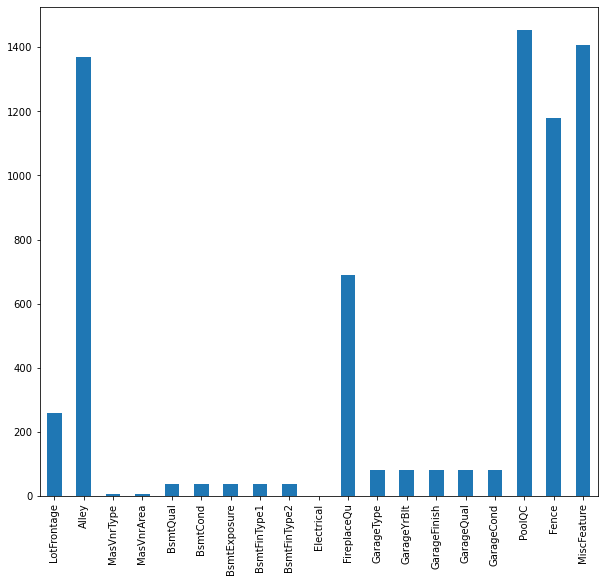

In [15]:
# No of missing values more than '0'

plt.figure(figsize=(10,9))
train_missing.plot.bar()

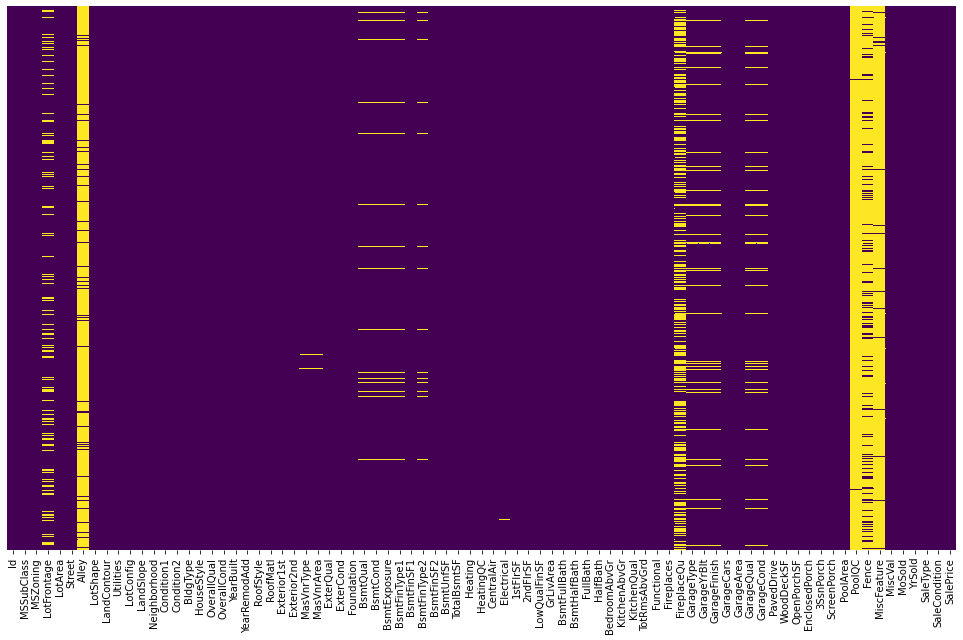

In [16]:
plt.figure(figsize=(17,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Train : No of Missing Values more than 25%
#### Length of dataset = 1460 (No of rows per column)
#### Columns have missing values more than 25%   ------>    1460*25/100 = 365

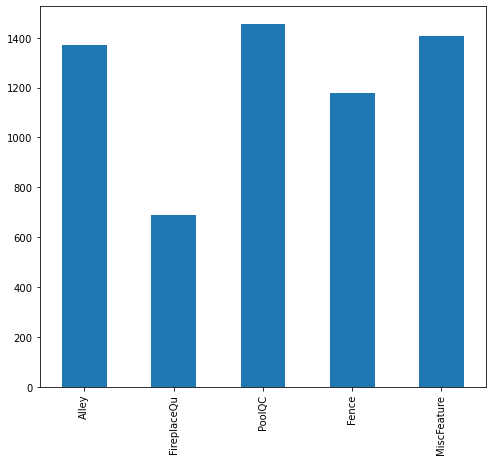

In [17]:
# No of missing values more than 25%

datatrain = train.isnull().sum()
datatrain = datatrain[datatrain > 365]
datatrain.sort_values(ascending=False)
plt.figure(figsize=(8,7))
datatrain.plot.bar()

### a. Train : Numeric Features

In [18]:
numeric_cols_train = train.select_dtypes(include=[np.number])
display(numeric_cols_train.head())
print('\n')
numeric_cols_train.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
numeric_cols_train.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

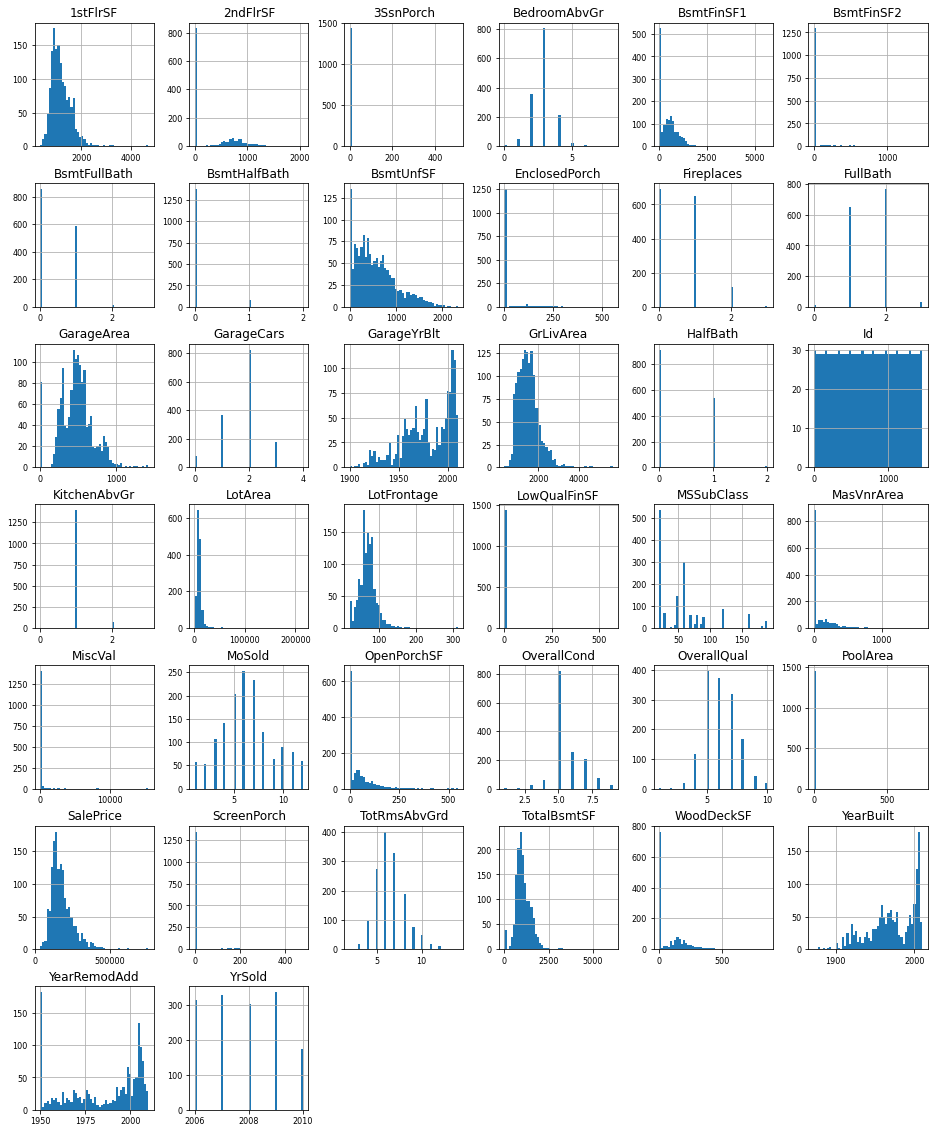

In [20]:
numeric_cols_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### b. Train : Categorical Features

In [21]:
categorical_cols_train = train.select_dtypes(include=[np.object])
display(categorical_cols_train.head())
print('\n')
categorical_cols_train.columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
categorical_cols_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

### Test data

In [23]:
test.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [24]:
test_missing = test.isnull().sum()
test_missing = test_missing[test_missing > 0]
test_missing.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

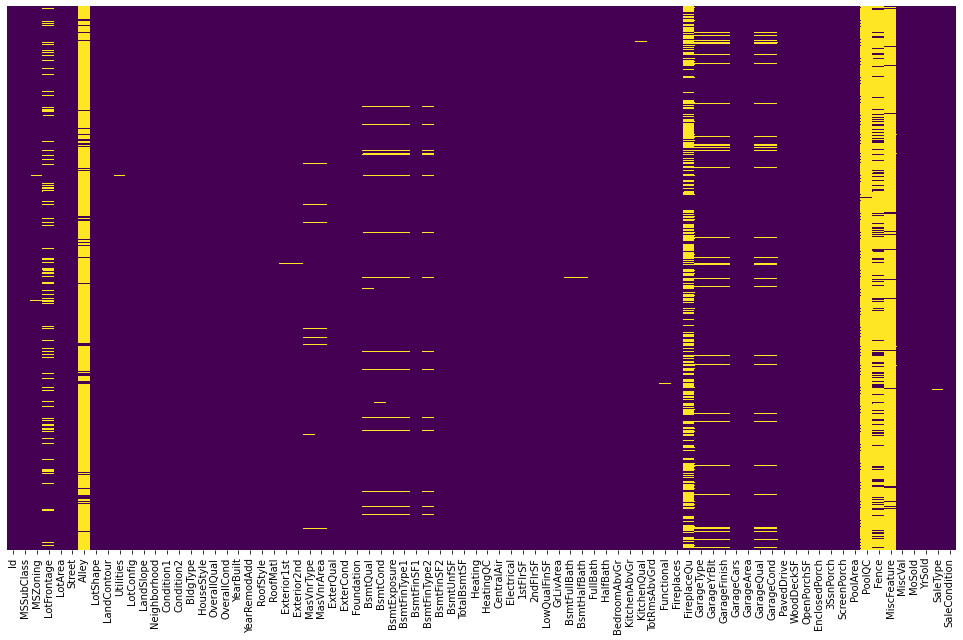

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Test : No of Missing Values more than 25%
#### Length of dataset = 1459 (No of rows per column)
#### Columns have missing values more than 25%   ------>    1459*25/100 = 365

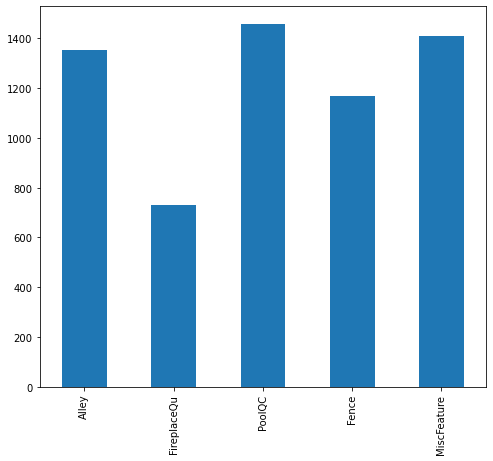

In [26]:
# No of missing values more than 25%

datatest = test.isnull().sum()
datatest = datatest[datatest > 365]
datatest.sort_values(ascending=False)
plt.figure(figsize=(8,7))
datatest.plot.bar()

### a. Test : Numeric Features

In [27]:
numeric_cols_test = test.select_dtypes(exclude='object')
display(numeric_cols_test.head())
print('\n')
numeric_cols_test.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [28]:
numeric_cols_test.isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
LowQualFinSF       0
LotArea            0
MSSubClass         0
1stFlrSF           0
2ndFlrSF           0
YrSold             0
GrLivArea          0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
Id                 0
dtype: int64

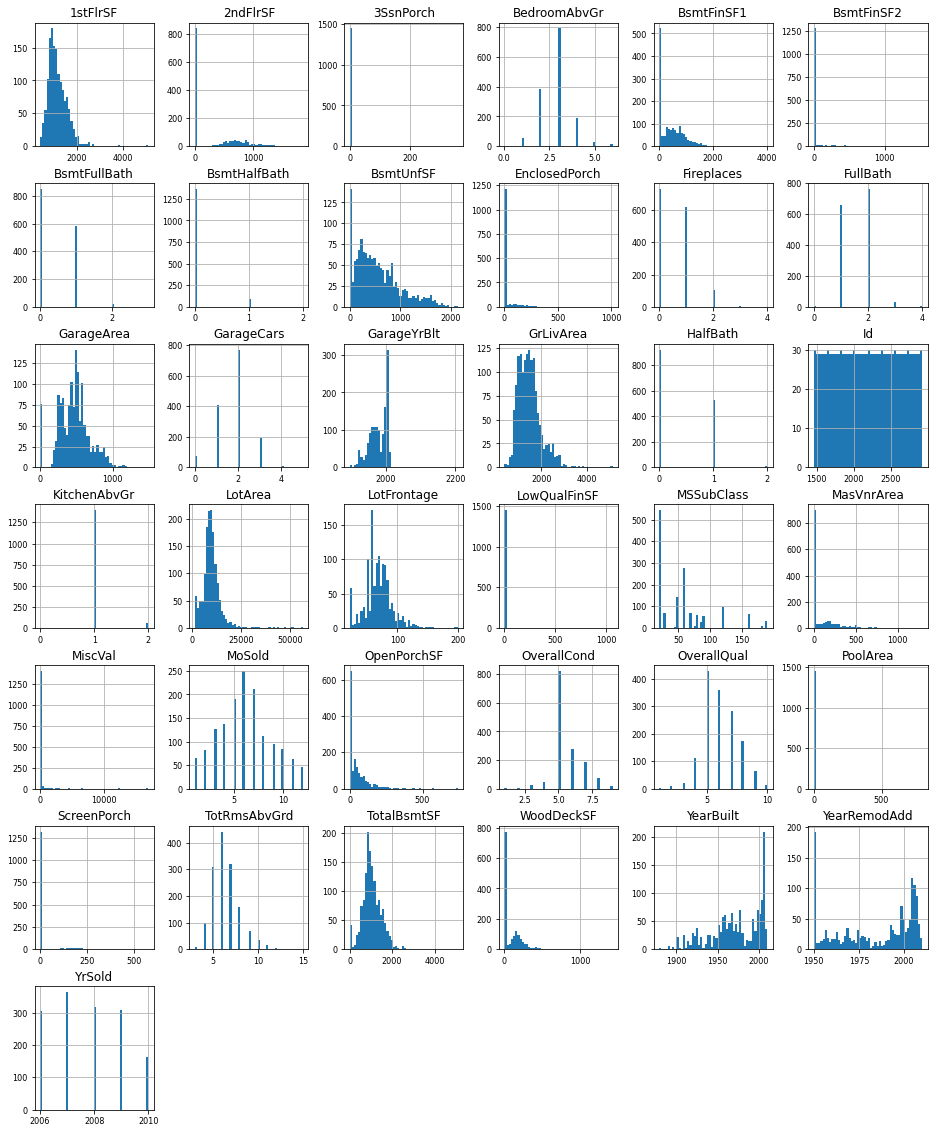

In [29]:
numeric_cols_test.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### b. Test : Categorical Features

In [30]:
categorical_cols_test = test.select_dtypes(include=[np.object])
display(categorical_cols_test.head())
print('\n')
categorical_cols_test.columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
categorical_cols_test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MSZoning            4
Utilities           2
Functional          2
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition2          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
Electrical          0
CentralAir          0
SaleCondition       0
dtype: int64

In [32]:
# Drop columns of train dataset with more than 25% of missing data

train.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True, axis=1)

In [33]:
# Drop columns of test dataset with more than 25% of missing data

test.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True, axis=1)

### filling nan values of categorical features by their mode and numeric ones by thier mean.

In [34]:
df = [train, test]

In [35]:
    # train data
    
      # Numeric Features
        
    train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())#float
    train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())#float
    train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())#float
    
      # Categorical Features
        
    train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
    train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
    train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
    train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
    train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
    train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
    train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
    train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
    train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
    train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
    train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
    
    # test data
    
      # Numeric Featurestrain
        
    test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())#float
    test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())#float
    test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())#float
    test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
    test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
    test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
    test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
    test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
    test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
    test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
    test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
    
      # Categorical Features
        
    test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
    test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
    test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
    test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
    test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
    test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
    test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
    test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
    test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
    test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
    test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
    test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
    test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
    test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
    test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
    test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
    test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

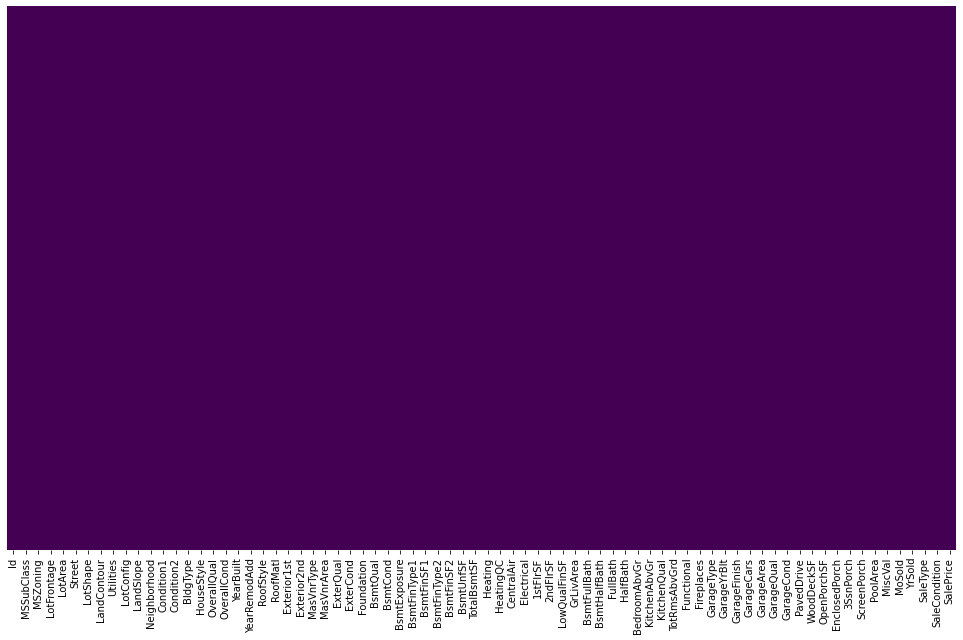

In [36]:
plt.figure(figsize=(17,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

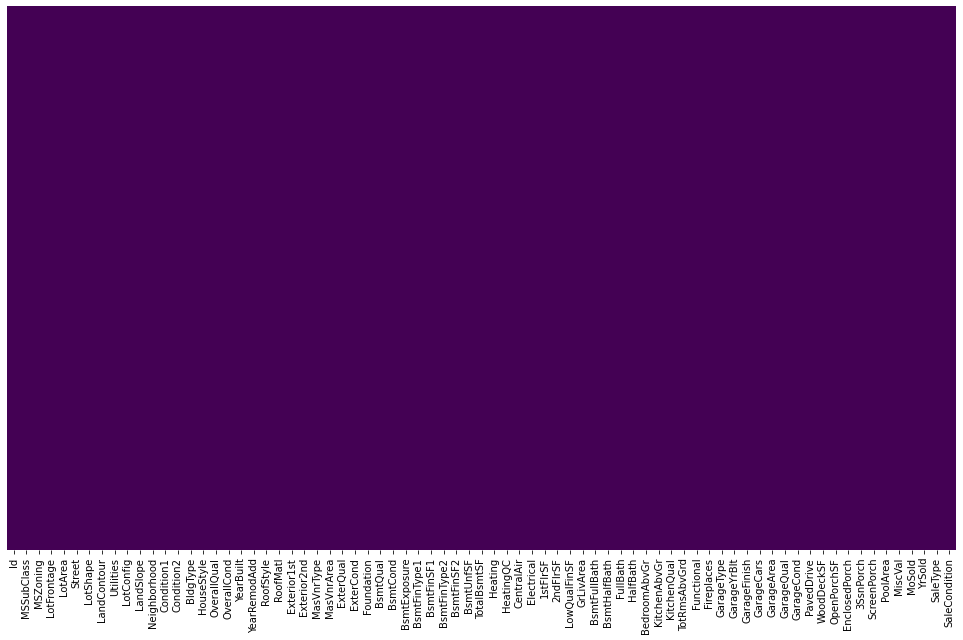

In [37]:
plt.figure(figsize=(17,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<h2 style="color:blue" align="left"> EDA (Exploratory Data Analysis) </h2>

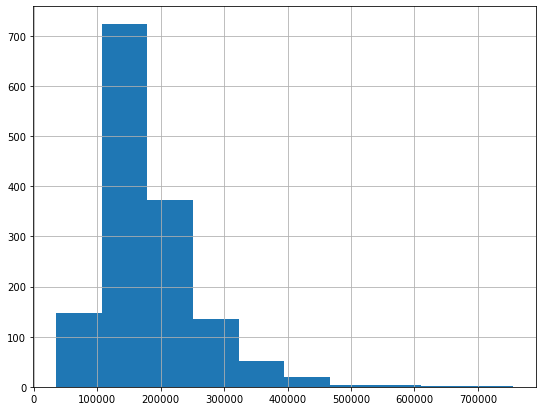

In [38]:
plt.figure(figsize=(9,7))
train['SalePrice'].hist()

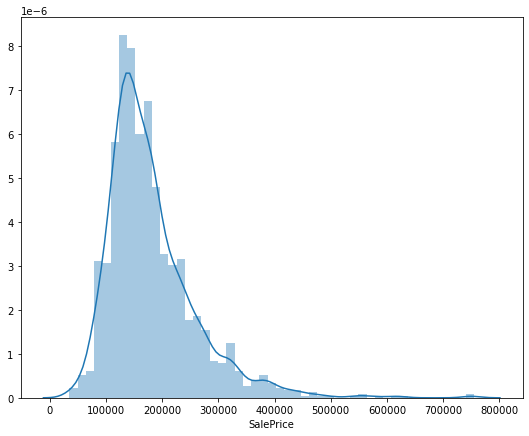

In [39]:
plt.figure(figsize=(9,7))
sns.distplot(train['SalePrice'])

- With this information we can see that the prices are skewed right and some outliers lies above ~500,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (SalePrice) for machine learning

### Correlation
- Now we'll try to find which features are strongly correlated with SalePrice.

In [40]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
MasVnrArea       0.225854
GarageYrBlt      0.221067
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.112159
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

### SalePrice vs OverallQual

In [41]:
import matplotlib.style as style
style.use('fivethirtyeight')

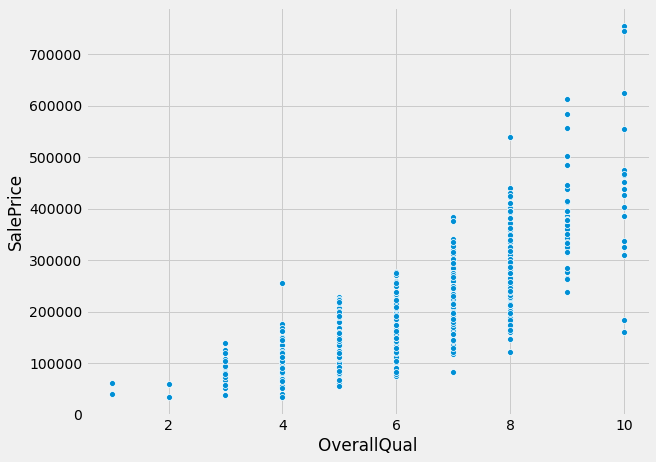

In [42]:
plt.figure(figsize=(9,7))
sns.scatterplot(train.OverallQual, train.SalePrice)

### SalePrice vs GrLivArea

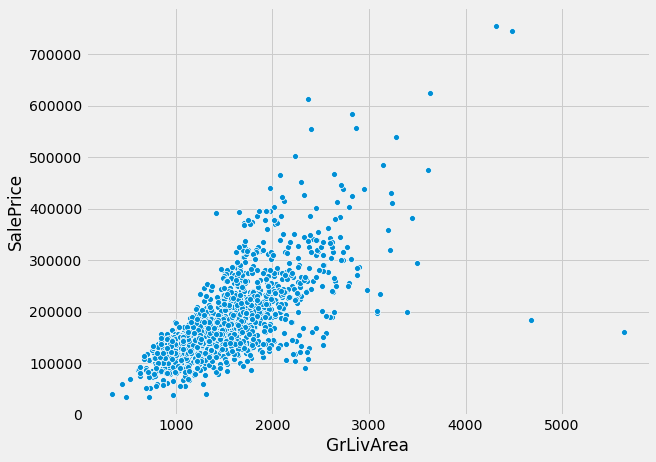

In [43]:
plt.figure(figsize=(9,7))
sns.scatterplot(train.GrLivArea, train.SalePrice)

### SalePrice vs GarageArea

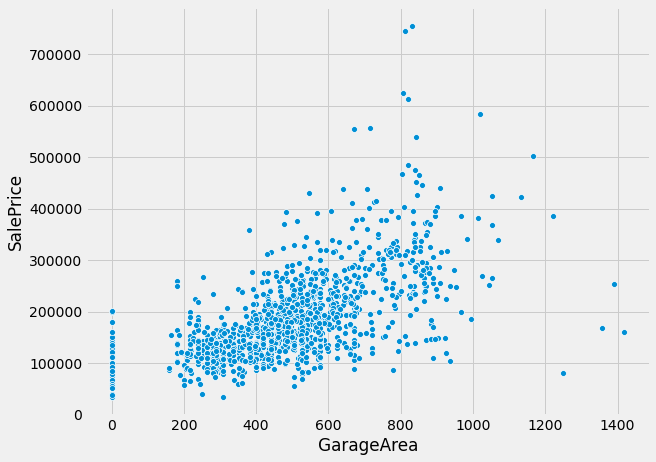

In [44]:
plt.figure(figsize=(9,7))
sns.scatterplot(train.GarageArea, train.SalePrice)

### SalePrice vs TotalBsmtSF

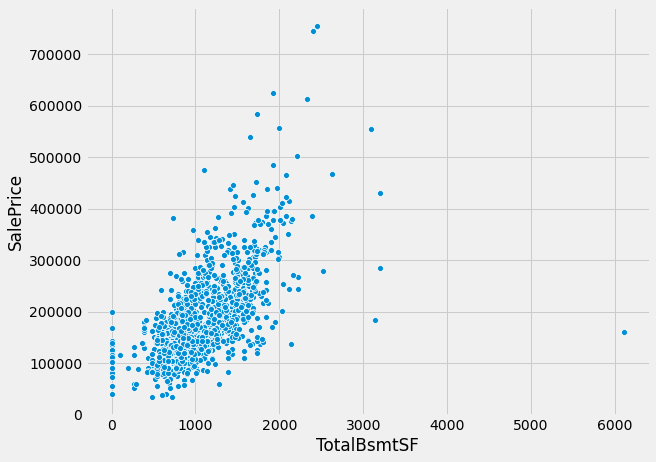

In [45]:
plt.figure(figsize=(9,7))
sns.scatterplot(train.TotalBsmtSF, train.SalePrice)

### SalePrice vs 1stFlrSF

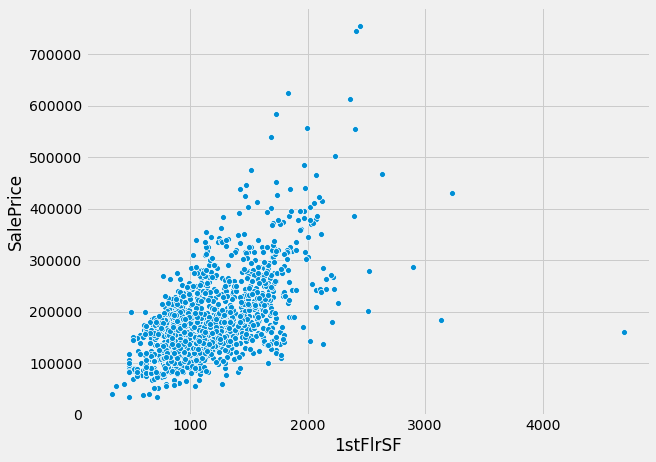

In [46]:
plt.figure(figsize=(9,7))
sns.scatterplot(train['1stFlrSF'], train.SalePrice)

### SalePrice vs MasVnrArea

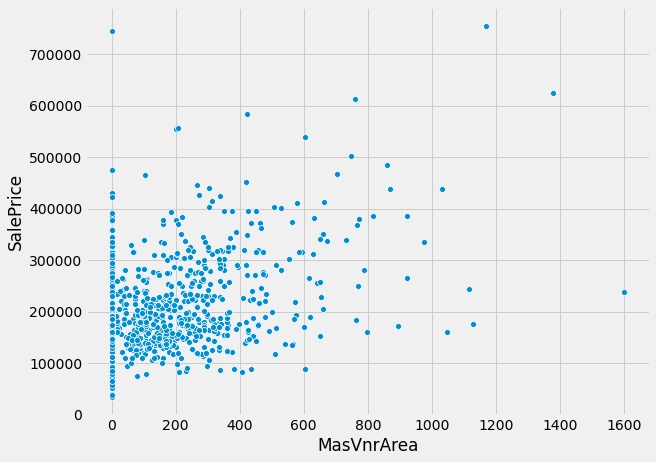

In [47]:
plt.figure(figsize=(9,7))
sns.scatterplot(train.MasVnrArea, train.SalePrice)

<h1 style="color:blue" align="left"> Feature to feature relationship </h1>

### Visualisation methods to analyze the data:
- Correlation Heat Map
- Zoomed Heat Map
- Pair Plot
- Scatter Plot

### Correlation Heat Map

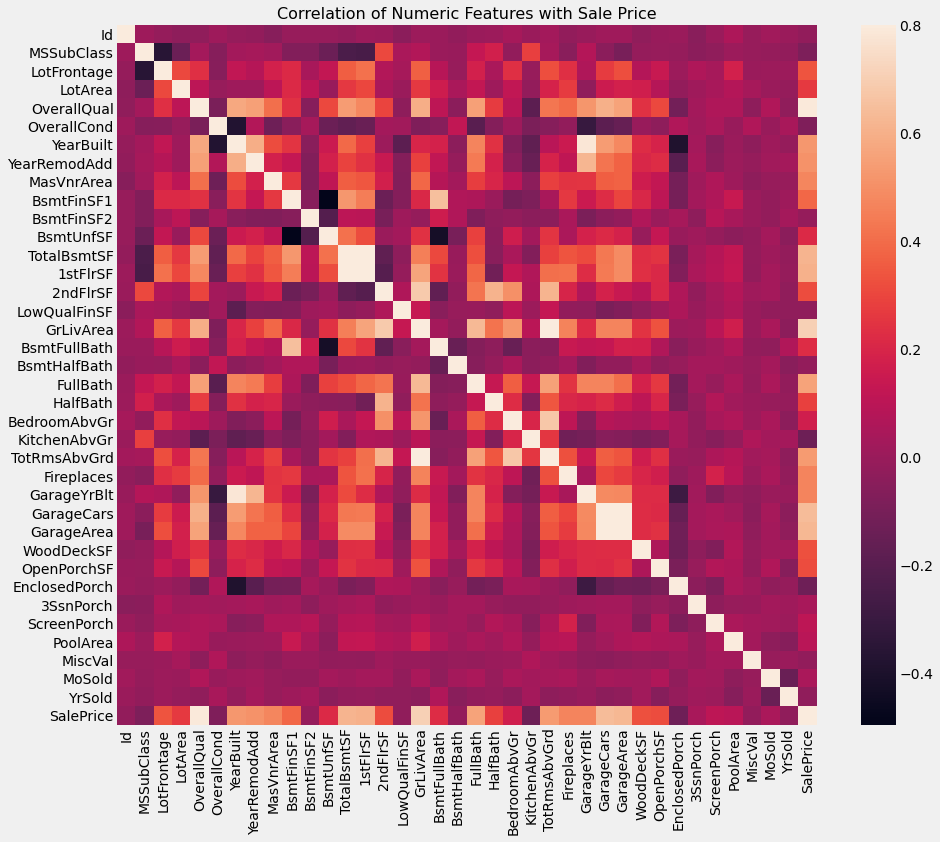

In [48]:
plt.figure(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)
sns.heatmap(train.corr(), square = True, vmax=0.8)

### Selected HeatMap

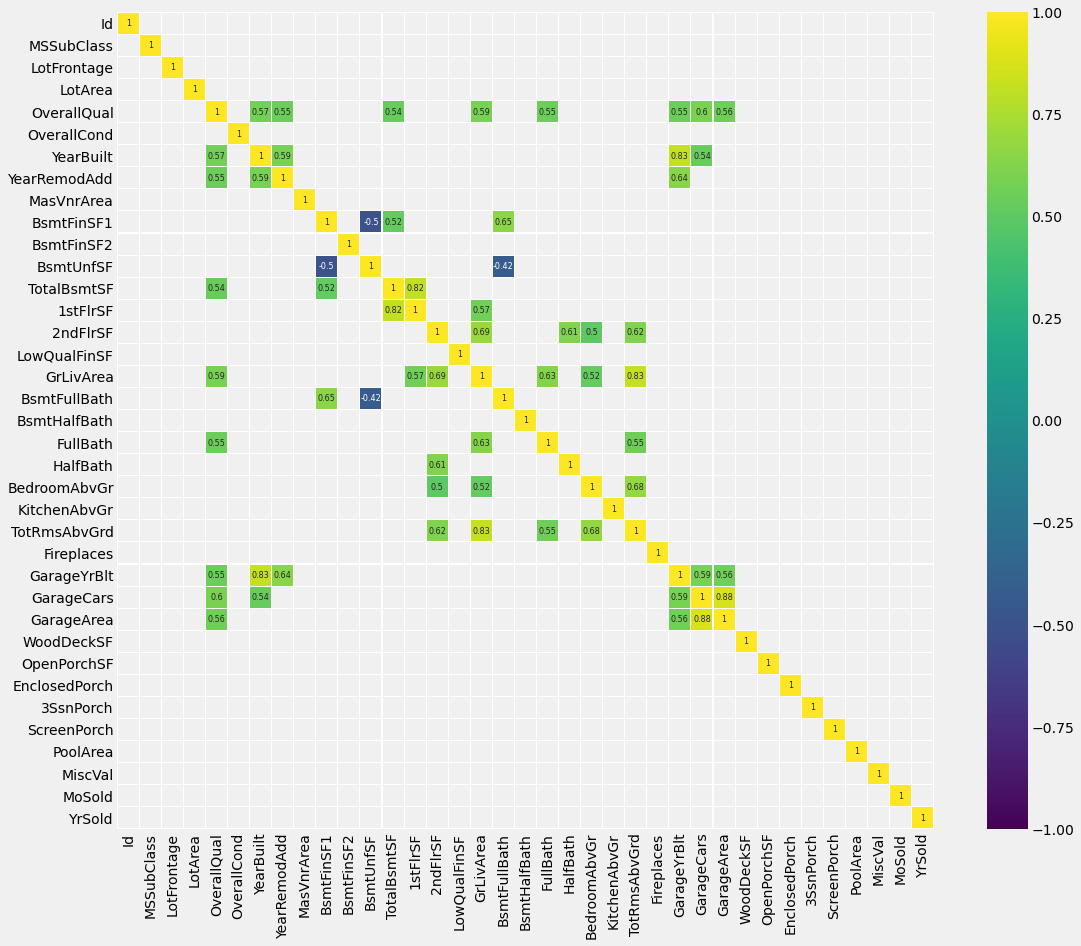

In [49]:
corr = numeric_cols_train.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(17, 14))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- A lot of features seems to be correlated between each other but some of them such as **YearBuild/GarageYrBlt** may just indicate a price inflation over the years. As for **1stFlrSF/TotalBsmtSF**, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

- There is a strong negative correlation between **BsmtUnfSF and BsmtFinSF2**.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


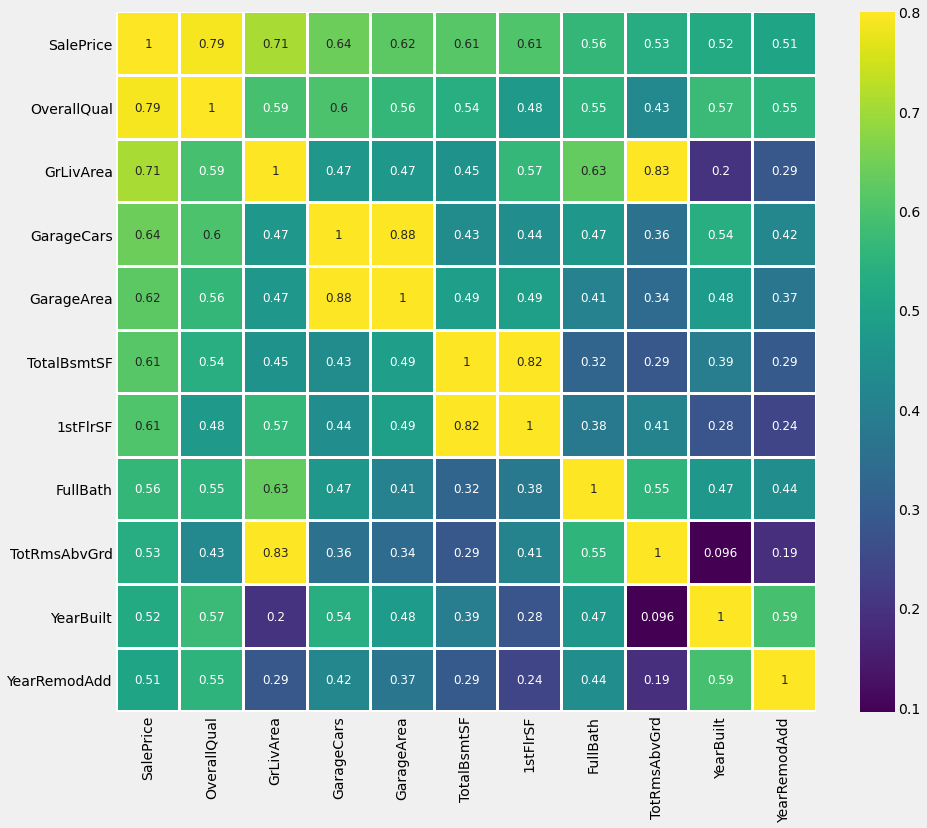

In [50]:
plt.figure(figsize=(14,12))
corr = numeric_cols_train.corr()
k= 11
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, cmap='viridis', vmax=.8, annot=True, linewidth=2, linecolor="white", xticklabels = cols.values,
            yticklabels = cols.values, square=True, annot_kws = {'size':12})

- 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).


- 'TotRmsAbvGrd' and 'GrLivArea', twins

### Pair Plot
#### Pair Plot between 'SalePrice' and correlated variables

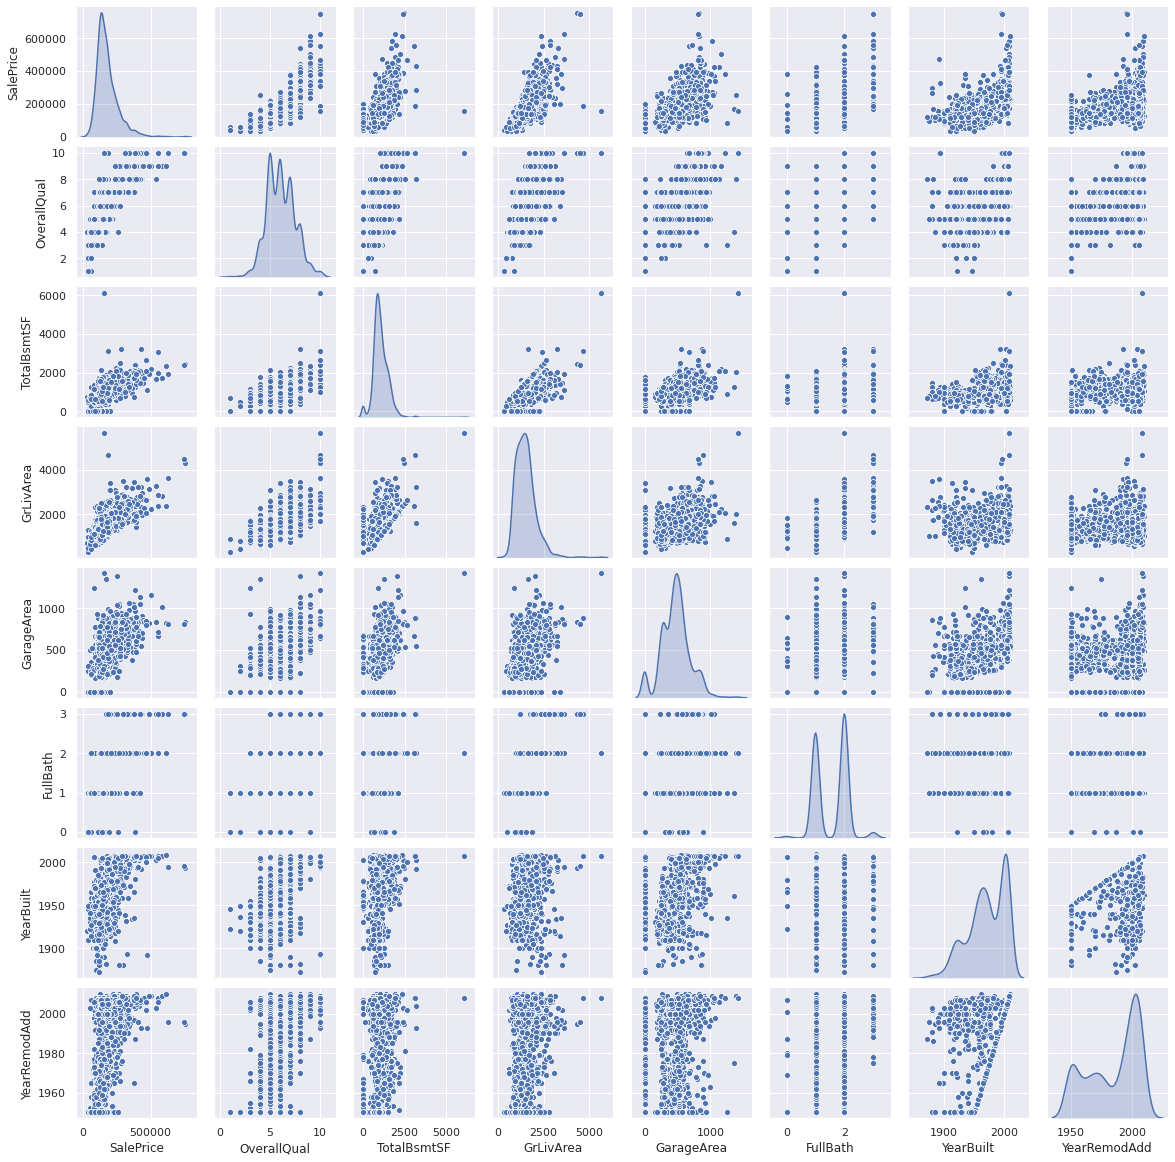

In [51]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns], height = 2, kind ='scatter', diag_kind='kde')

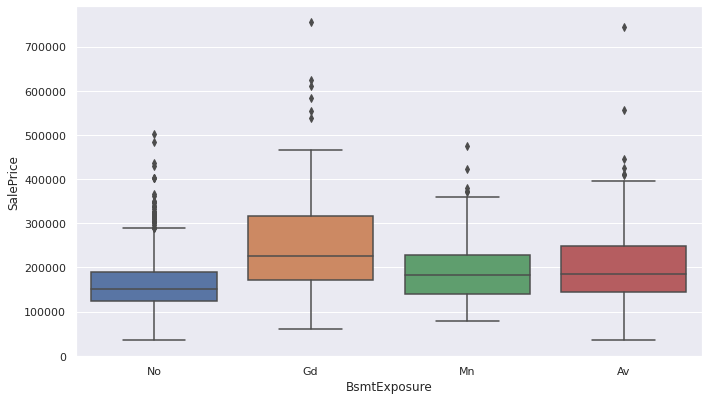

In [52]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=train)

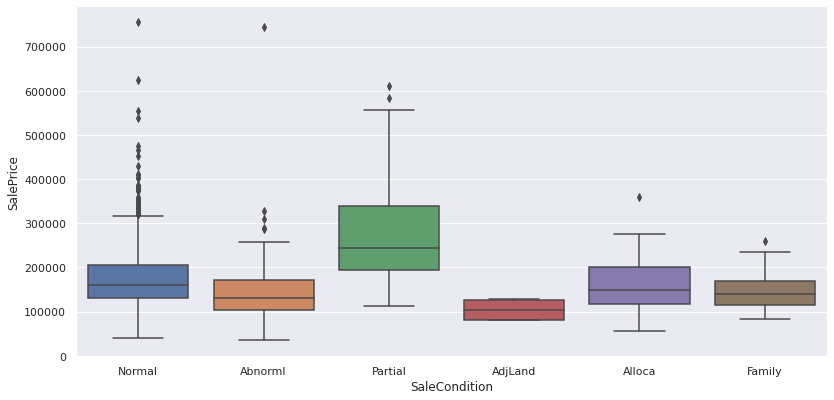

In [53]:
plt.figure(figsize = (12, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

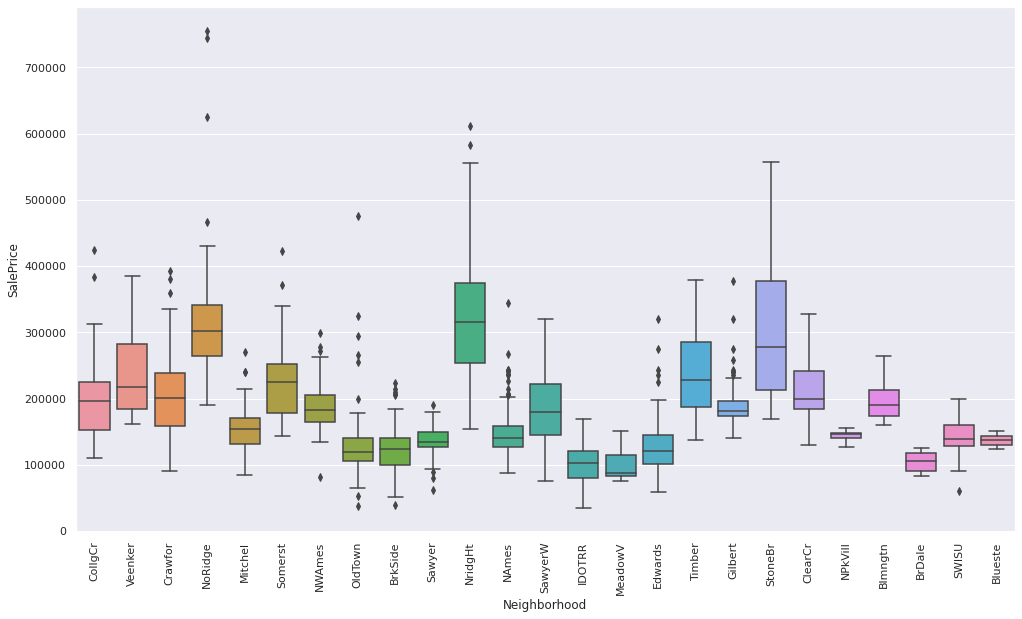

In [54]:
plt.figure(figsize=(15, 9))
sns.boxplot(x='Neighborhood', y="SalePrice", data=train)
plt.xticks(rotation=90)

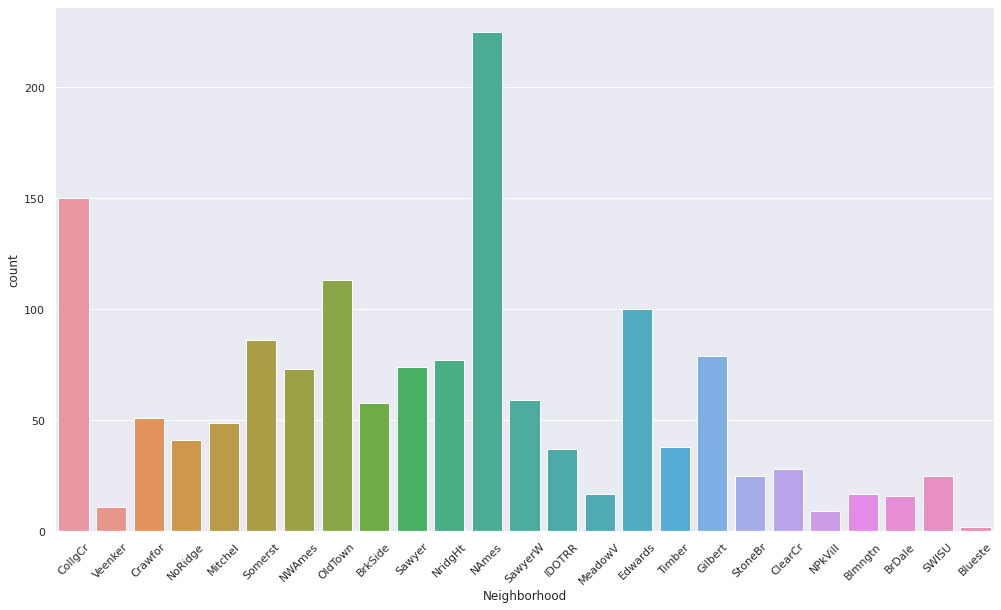

In [55]:
plt.figure(figsize = (15, 9))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=45)

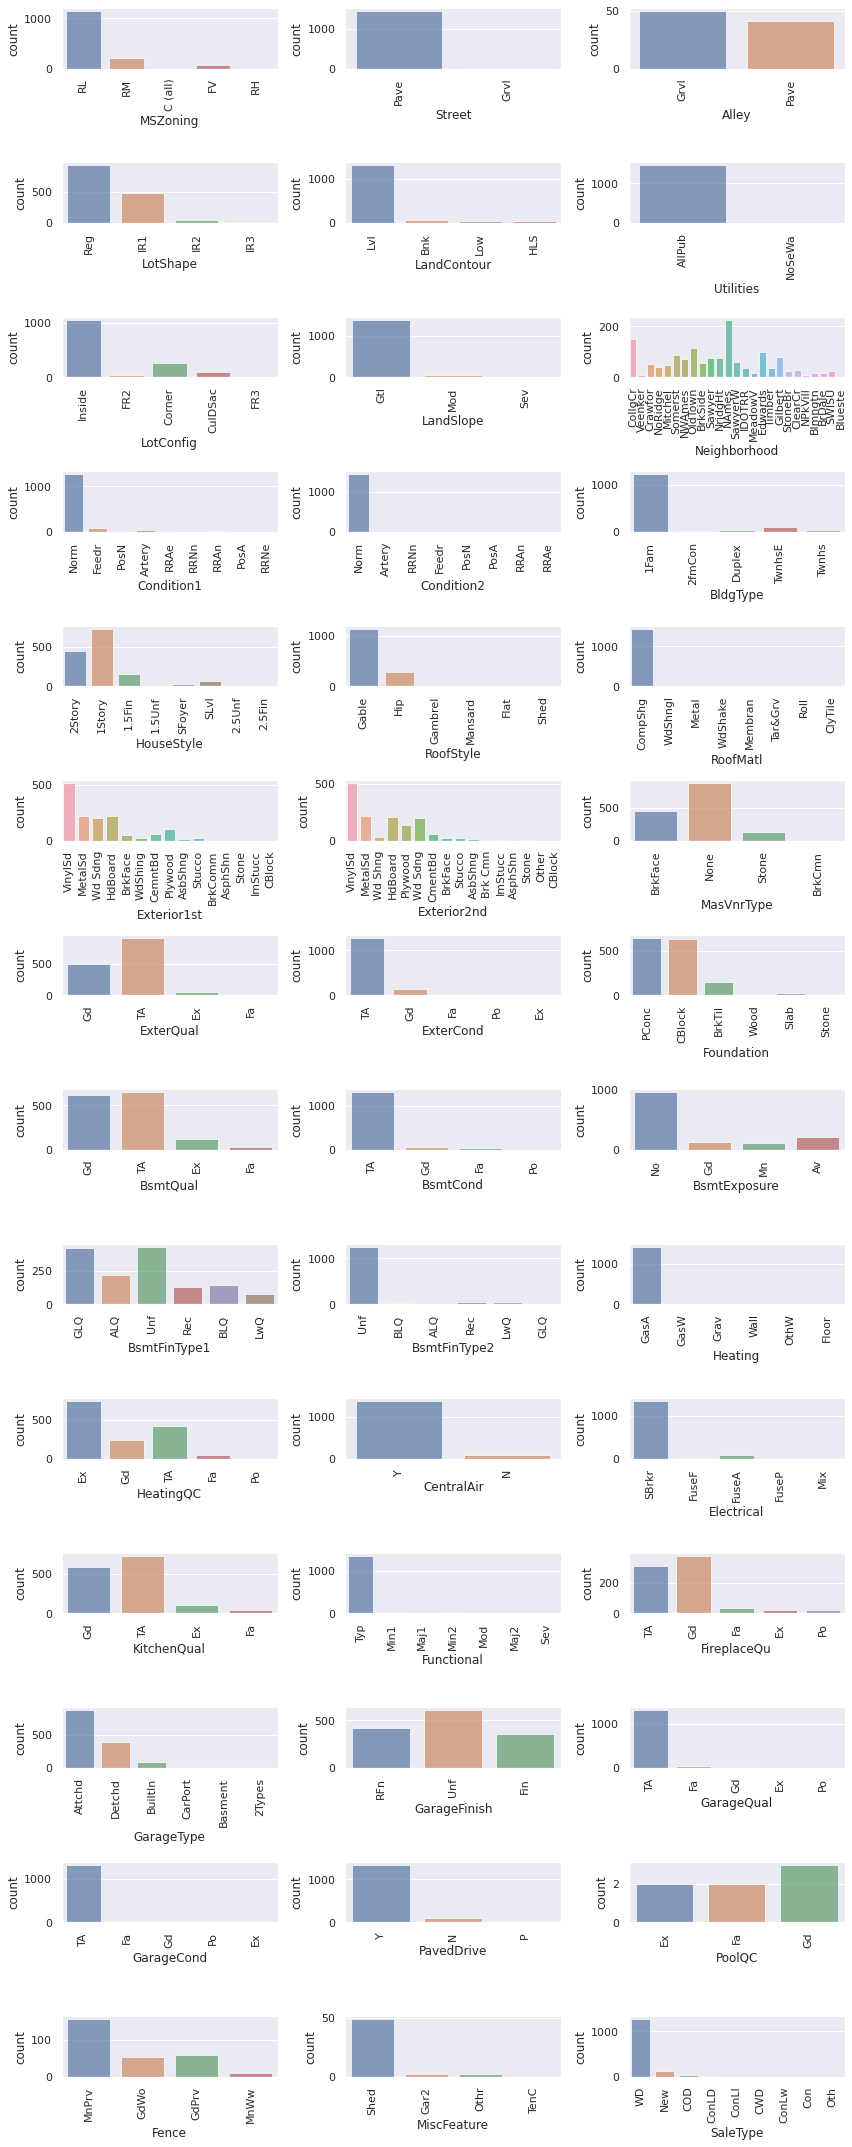

In [56]:
fig, axes = plt.subplots(round(len(categorical_cols_train.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_cols_train.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=categorical_cols_train.columns[i], alpha=0.7, data=categorical_cols_train, ax=ax)

fig.tight_layout()

<h2 style="color:blue" align="left"> Feature Engineering </h2>

In [57]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [58]:
Housing = pd.concat([train, test])
Housing.shape

(2919, 76)

In [59]:
Housing = pd.get_dummies(Housing, drop_first=True)
Housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
Housing.shape

(2919, 234)

In [61]:
train = Housing.iloc[: 1460, :]
test = Housing.iloc[1460: , :]

In [62]:
train.shape, test.shape

((1460, 234), (1459, 234))

In [63]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
test = test.drop('SalePrice', axis=1)

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

### Decision Tree

In [65]:
DTR = DecisionTreeRegressor()
DTR.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
DTR.score(X, y)

1.0

In [67]:
DTR.predict(test)

array([130000., 155000., 193000., ..., 167500., 100000., 219500.])

<h3 style="color:green" align="left"> Random Forest </h3>

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [69]:
y_pred = model.predict(test)

In [70]:
model.score(test,y_pred)

1.0

In [71]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
submission.to_csv('Housing_submission.csv', index=False)